In [1]:
# Load all libraries

import xarray
import pathlib
from os import listdir
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Find only the TREFHT files

files = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_hist/*.TREFHT.*')
print(files)

['/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.001.cam.h0.TREFHT.185001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.005.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.006.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.007.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.008.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.009.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/c

In [3]:
# Ensemble - Processing all of the datasets

LENS_list = []
ensem_num = 0
for file in files:
    model_run = xarray.open_dataset(file)
    xarray.decode_cf(model_run)
    TREFHT_data = model_run.TREFHT
    TREFHT_data['ensemble_member'] = ensem_num # Creating a new dimension for each ensemble member
    ensem_num += 1
    LENS_list.append(TREFHT_data)
LENS = xarray.concat(LENS_list, dim='ensemble_member')
LENS

<xarray.DataArray 'TREFHT' (ensemble_member: 42, time: 1872, lat: 289, lon: 288)>
array([[[[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         ...,
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan]],

        [[      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
         [      nan,       nan,       nan, ...,       nan,       nan,
                nan],
...
         [243.06628, 243.05663, 243.04558, ..., 243.07681, 243.07413,
          243.07127],
         [243.07501, 243.077  , 243.07886, ..., 243.06697, 243.07054,
          243.07295],
         [243.0688 , 243.06892, 243.06902, ..., 243.06839, 243.06854,
          243.06868]],

        [[243.08221, 243.47409, 243.48491, ..., 243.43898, 243.06932,
          243.50412],
         [243.91762, 243.96977, 243.50687, ..., 243.69089, 243.8466 ,
          243.6881 ],
         [244.8376 , 244.87814, 244.4813 , ..., 244.65936, 244.9116 ,
          244.89548],
         ...,
         [235.31036, 235.3073 , 235.302  , ..., 235.31943, 235.31612,
          235.3122 ],
         [235.12283, 235.12802, 235.1337 , ..., 235.10875, 235.11299,
          235.1178 ],
         [235.31436, 235.31328, 235.31227, ..., 235.31844, 235.31694,
          235.3156 ]]]], dtype=float32)
Coordinates:
  * lat              (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon              (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time             (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:00:00
  * ensemble_member  (ensemble_member) int64 0 1 2 3 4 5 6 ... 36 37 38 39 40 41
Attributes:
    units:         K
    long_name:     Reference height temperature
    cell_methods:  time: mean

## Regional natural variability

In [4]:
# Finding the mean across the ensemble

T_avg = LENS.mean('ensemble_member')
T_avg

<xarray.DataArray 'TREFHT' (time: 1872, lat: 289, lon: 288)>
array([[[239.67155, 240.25024, 240.28055, ..., 240.2148 , 239.66075,
         240.30418],
        [240.13441, 240.22368, 240.5453 , ..., 240.58913, 239.98471,
         239.54623],
        [240.52483, 240.54878, 240.9797 , ..., 240.5723 , 240.57925,
         240.5653 ],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [234.93335, 234.9248 , 234.9163 , ..., 234.95978, 234.952  ,
         234.9426 ],
        [235.28714, 235.2857 , 235.28438, ..., 235.29247, 235.29051,
         235.28876]],

       [[231.92998, 232.2756 , 232.2956 , ..., 232.26602, 231.92949,
         232.30923],
        [232.66367, 232.73793, 232.97597, ..., 232.94708, 232.5199 ,
         232.27873],
        [233.23343, 233.26796, 233.53209, ..., 233.13759, 233.18542,
         233.1977 ],
...
        [244.58652, 244.60733, 244.62727, ..., 244.52998, 244.5483 ,
         244.56627],
        [245.15378, 245.16827, 245.18489, ..., 245.10547, 245.12274,
         245.1386 ],
        [244.94539, 244.94633, 244.94714, ..., 244.94194, 244.94324,
         244.94437]],

       [[240.89081, 241.37337, 241.37814, ..., 241.33873, 240.89413,
         241.38664],
        [241.53769, 241.57419, 241.89609, ..., 241.26895, 241.41034,
         241.30597],
        [242.36673, 242.4292 , 242.36877, ..., 242.43785, 242.45503,
         242.42331],
        ...,
        [241.7845 , 241.81662, 241.84682, ..., 241.69856, 241.72668,
         241.75366],
        [242.08607, 242.09885, 242.11212, ..., 242.04369, 242.05815,
         242.07248],
        [241.81578, 241.81682, 241.8178 , ..., 241.81192, 241.81331,
         241.81459]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:00:00

In [5]:
# Finding the natural anomalies across time and lat + longitude

T_anom = LENS - T_avg
T_anom

<xarray.DataArray 'TREFHT' (ensemble_member: 42, time: 1872, lat: 289, lon: 288)>
array([[[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
...
          -1.45317078e+00, -1.47416687e+00, -1.49499512e+00],
         [-2.07876587e+00, -2.09127808e+00, -2.10603333e+00, ...,
          -2.03849792e+00, -2.05220032e+00, -2.06564331e+00],
         [-1.87658691e+00, -1.87741089e+00, -1.87812805e+00, ...,
          -1.87355042e+00, -1.87469482e+00, -1.87568665e+00]],

        [[ 2.19140625e+00,  2.10072327e+00,  2.10676575e+00, ...,
           2.10025024e+00,  2.17518616e+00,  2.11747742e+00],
         [ 2.37992859e+00,  2.39558411e+00,  1.61077881e+00, ...,
           2.42193604e+00,  2.43626404e+00,  2.38212585e+00],
         [ 2.47087097e+00,  2.44894409e+00,  2.11251831e+00, ...,
           2.22151184e+00,  2.45657349e+00,  2.47216797e+00],
         ...,
         [-6.47413635e+00, -6.50932312e+00, -6.54481506e+00, ...,
          -6.37913513e+00, -6.41056824e+00, -6.44146729e+00],
         [-6.96324158e+00, -6.97082520e+00, -6.97842407e+00, ...,
          -6.93493652e+00, -6.94515991e+00, -6.95468140e+00],
         [-6.50141907e+00, -6.50354004e+00, -6.50552368e+00, ...,
          -6.49348450e+00, -6.49636841e+00, -6.49899292e+00]]]],
      dtype=float32)
Coordinates:
  * lat              (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon              (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time             (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:00:00
  * ensemble_member  (ensemble_member) int64 0 1 2 3 4 5 6 ... 36 37 38 39 40 41

In [12]:
# Natural variability

T_anom_modern = T_anom.loc[dict(time=slice("1920-01-01 00:00:00", "2006-01-01 00:00:00"))]
nat_variability = T_anom_modern.std('ensemble_member').mean('time')
nat_variability

<xarray.DataArray 'TREFHT' (lat: 289, lon: 288)>
array([[1.4475597, 1.4461242, 1.44593  , ..., 1.444974 , 1.4468504,
        1.4457965],
       [1.5984246, 1.5990009, 1.5935189, ..., 1.5987946, 1.5990825,
        1.5978155],
       [1.7150121, 1.712843 , 1.709978 , ..., 1.7269789, 1.7228944,
        1.7210072],
       ...,
       [2.2465036, 2.2499633, 2.253163 , ..., 2.2374473, 2.2404966,
        2.2432945],
       [2.3940597, 2.39549  , 2.396913 , ..., 2.3888507, 2.3907244,
        2.3924894],
       [2.3148518, 2.3151069, 2.3153517, ..., 2.3139734, 2.3142908,
        2.3145769]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

Text(0.5, 1.0, 'Natural Variability over 1920-2006 from CESM-LE')

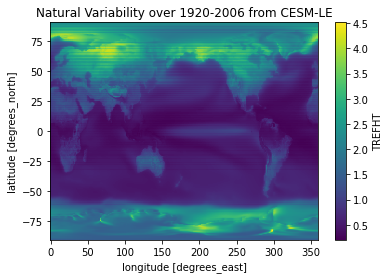

In [14]:
# Plotting

nat_variability.plot()
plt.title('Natural Variability over 1920-2006 from CESM-LE')

## Taking the mean across all members - Finding the forcing

In [ ]:
# Finding the mean across the ensemble

T_avg = LENS.mean('ensemble_member')
T_avg

In [5]:
# Finding the GLOBAl mean across the ensemble

T_forcing = T_avg.mean(('lat', 'lon'))
T_forcing

<xarray.DataArray 'TREFHT' (time: 1872)>
array([274.31528, 274.0233 , 274.07547, ..., 279.9651 , 278.42422,
       277.47797], dtype=float32)
Coordinates:
  * time     (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:00:00

Text(0.5, 1.0, 'Mean global temperature across ensemble members')

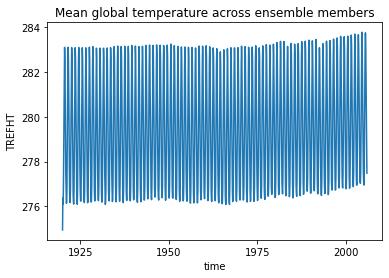

In [15]:
T_forcing.loc[dict(time=slice("1920-01-01 00:00:00", "2006-01-01 00:00:00"))].plot()
plt.title('Mean global temperature across ensemble members')

## Time mean temperatures

In [9]:
T_avg

<xarray.DataArray 'TREFHT' (time: 1872, lat: 289, lon: 288)>
array([[[239.67155, 240.25024, 240.28055, ..., 240.2148 , 239.66075,
         240.30418],
        [240.13441, 240.22368, 240.5453 , ..., 240.58913, 239.98471,
         239.54623],
        [240.52483, 240.54878, 240.9797 , ..., 240.5723 , 240.57925,
         240.5653 ],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [234.93335, 234.9248 , 234.9163 , ..., 234.95978, 234.952  ,
         234.9426 ],
        [235.28714, 235.2857 , 235.28438, ..., 235.29247, 235.29051,
         235.28876]],

       [[231.92998, 232.2756 , 232.2956 , ..., 232.26602, 231.92949,
         232.30923],
        [232.66367, 232.73793, 232.97597, ..., 232.94708, 232.5199 ,
         232.27873],
        [233.23343, 233.26796, 233.53209, ..., 233.13759, 233.18542,
         233.1977 ],
...
        [244.58652, 244.60733, 244.62727, ..., 244.52998, 244.5483 ,
         244.56627],
        [245.15378, 245.16827, 245.18489, ..., 245.10547, 245.12274,
         245.1386 ],
        [244.94539, 244.94633, 244.94714, ..., 244.94194, 244.94324,
         244.94437]],

       [[240.89081, 241.37337, 241.37814, ..., 241.33873, 240.89413,
         241.38664],
        [241.53769, 241.57419, 241.89609, ..., 241.26895, 241.41034,
         241.30597],
        [242.36673, 242.4292 , 242.36877, ..., 242.43785, 242.45503,
         242.42331],
        ...,
        [241.7845 , 241.81662, 241.84682, ..., 241.69856, 241.72668,
         241.75366],
        [242.08607, 242.09885, 242.11212, ..., 242.04369, 242.05815,
         242.07248],
        [241.81578, 241.81682, 241.8178 , ..., 241.81192, 241.81331,
         241.81459]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:00:00

In [10]:
T_meantime = T_avg.mean('time')
T_meantime

<xarray.DataArray 'TREFHT' (lat: 289, lon: 288)>
array([[223.03389, 223.21017, 223.2196 , ..., 223.2014 , 223.03261,
        223.22871],
       [223.41222, 223.46187, 223.56837, ..., 223.27187, 223.27855,
        223.25485],
       [223.63995, 223.71722, 223.76534, ..., 223.44197, 223.53877,
        223.55954],
       ...,
       [251.8608 , 251.88252, 251.90292, ..., 251.80453, 251.82289,
        251.84044],
       [250.98079, 250.99031, 251.00023, ..., 250.94962, 250.95998,
        250.97076],
       [250.82648, 250.82695, 250.82755, ..., 250.82433, 250.82506,
        250.8258 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

Text(0.5, 1.0, 'Average temperature over time')

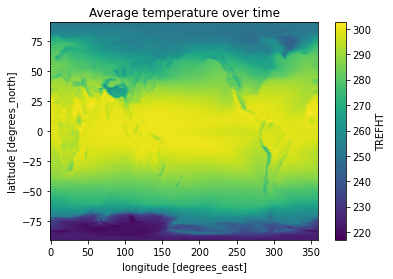

In [16]:
T_meantime.plot()
plt.title('Average temperature over time')

## Changes in natural variability over time

In [17]:
# Finding the natural anomalies across time and lat + longitude

T_anom = LENS - T_avg
T_anom

<xarray.DataArray 'TREFHT' (ensemble_member: 42, time: 1872, lat: 289, lon: 288)>
array([[[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
...
          -1.45317078e+00, -1.47416687e+00, -1.49499512e+00],
         [-2.07876587e+00, -2.09127808e+00, -2.10603333e+00, ...,
          -2.03849792e+00, -2.05220032e+00, -2.06564331e+00],
         [-1.87658691e+00, -1.87741089e+00, -1.87812805e+00, ...,
          -1.87355042e+00, -1.87469482e+00, -1.87568665e+00]],

        [[ 2.19140625e+00,  2.10072327e+00,  2.10676575e+00, ...,
           2.10025024e+00,  2.17518616e+00,  2.11747742e+00],
         [ 2.37992859e+00,  2.39558411e+00,  1.61077881e+00, ...,
           2.42193604e+00,  2.43626404e+00,  2.38212585e+00],
         [ 2.47087097e+00,  2.44894409e+00,  2.11251831e+00, ...,
           2.22151184e+00,  2.45657349e+00,  2.47216797e+00],
         ...,
         [-6.47413635e+00, -6.50932312e+00, -6.54481506e+00, ...,
          -6.37913513e+00, -6.41056824e+00, -6.44146729e+00],
         [-6.96324158e+00, -6.97082520e+00, -6.97842407e+00, ...,
          -6.93493652e+00, -6.94515991e+00, -6.95468140e+00],
         [-6.50141907e+00, -6.50354004e+00, -6.50552368e+00, ...,
          -6.49348450e+00, -6.49636841e+00, -6.49899292e+00]]]],
      dtype=float32)
Coordinates:
  * lat              (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon              (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time             (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:00:00
  * ensemble_member  (ensemble_member) int64 0 1 2 3 4 5 6 ... 36 37 38 39 40 41

In [18]:
# Natural variability within last ten years: 1996-2006

T_anom_lastten = T_anom.loc[dict(time=slice("1996-01-01 00:00:00", "2006-01-01 00:00:00"))]
nat_variability_lastten = T_anom_lastten.std('ensemble_member').mean('time')
nat_variability_lastten

<xarray.DataArray 'TREFHT' (lat: 289, lon: 288)>
array([[1.4919436, 1.4906216, 1.4905325, ..., 1.4895577, 1.4910204,
        1.4904991],
       [1.6439128, 1.6436936, 1.6410679, ..., 1.6463959, 1.6458244,
        1.6435803],
       [1.7734357, 1.7687229, 1.7692593, ..., 1.7849509, 1.7802013,
        1.7780076],
       ...,
       [2.301083 , 2.304221 , 2.3070464, ..., 2.2923472, 2.2953293,
        2.2980344],
       [2.3131049, 2.3144956, 2.3159537, ..., 2.3077986, 2.3096972,
        2.3115065],
       [2.2381356, 2.238387 , 2.2386088, ..., 2.2373211, 2.2376306,
        2.2379134]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

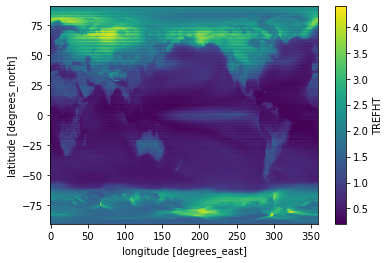

In [19]:
nat_variability_lastten.plot()

In [20]:
# Natural variability within the first ten years: 1920-1930

T_anom_firstten = T_anom.loc[dict(time=slice("1920-01-01 00:00:00", "1930-01-01 00:00:00"))]
nat_variability_firstten = T_anom_firstten.std('ensemble_member').mean('time')
nat_variability_firstten

<xarray.DataArray 'TREFHT' (lat: 289, lon: 288)>
array([[1.417243 , 1.4158758, 1.4152642, ..., 1.4148151, 1.4164969,
        1.4150463],
       [1.5584806, 1.5607337, 1.555717 , ..., 1.5587156, 1.5588202,
        1.5589445],
       [1.674631 , 1.6710219, 1.6676658, ..., 1.6888887, 1.6836971,
        1.6817765],
       ...,
       [2.3163502, 2.3200579, 2.3234677, ..., 2.3064415, 2.3097775,
        2.3128405],
       [2.3559575, 2.3574905, 2.3589156, ..., 2.3506644, 2.3524184,
        2.3542967],
       [2.275803 , 2.2760518, 2.2763336, ..., 2.274928 , 2.275215 ,
        2.2755082]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

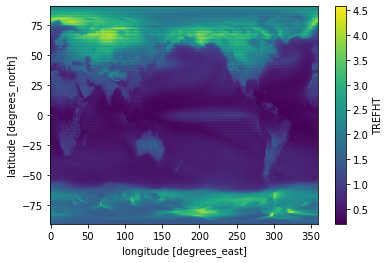

In [21]:
nat_variability_firstten.plot()

In [22]:
#Change in natural variability from 1920-1930 to 1996-2006
nat_variability_change = nat_variability_lastten - nat_variability_firstten
nat_variability_change

<xarray.DataArray 'TREFHT' (lat: 289, lon: 288)>
array([[ 0.07470059,  0.07474577,  0.07526827, ...,  0.07474267,
         0.07452357,  0.0754528 ],
       [ 0.08543217,  0.08295989,  0.08535087, ...,  0.08768034,
         0.08700418,  0.08463585],
       [ 0.09880471,  0.09770095,  0.10159349, ...,  0.09606218,
         0.09650421,  0.0962311 ],
       ...,
       [-0.01526713, -0.01583695, -0.01642132, ..., -0.01409435,
        -0.01444817, -0.01480603],
       [-0.04285264, -0.04299498, -0.04296184, ..., -0.04286575,
        -0.04272127, -0.04279017],
       [-0.03766751, -0.03766465, -0.03772473, ..., -0.03760695,
        -0.0375843 , -0.0375948 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

Text(0.5, 1.0, 'Change in natural variability from 1920-1930 to 1996-2006')

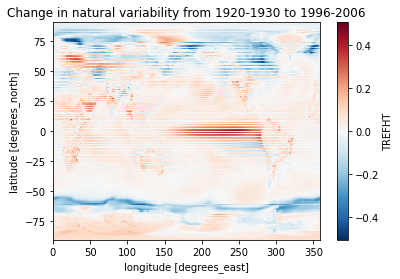

In [24]:
nat_variability_change.plot()
plt.title('Change in natural variability from 1920-1930 to 1996-2006')

## Global anomaly without base period

In [4]:
# Finding the mean across the ensemble

T_avg = LENS.mean('ensemble_member')
T_avg

<xarray.DataArray 'TREFHT' (time: 1872, lat: 289, lon: 288)>
array([[[239.67155, 240.25024, 240.28055, ..., 240.2148 , 239.66075,
         240.30418],
        [240.13441, 240.22368, 240.5453 , ..., 240.58913, 239.98471,
         239.54623],
        [240.52483, 240.54878, 240.9797 , ..., 240.5723 , 240.57925,
         240.5653 ],
        ...,
        [      nan,       nan,       nan, ...,       nan,       nan,
               nan],
        [234.93335, 234.9248 , 234.9163 , ..., 234.95978, 234.952  ,
         234.9426 ],
        [235.28714, 235.2857 , 235.28438, ..., 235.29247, 235.29051,
         235.28876]],

       [[231.92998, 232.2756 , 232.2956 , ..., 232.26602, 231.92949,
         232.30923],
        [232.66367, 232.73793, 232.97597, ..., 232.94708, 232.5199 ,
         232.27873],
        [233.23343, 233.26796, 233.53209, ..., 233.13759, 233.18542,
         233.1977 ],
...
        [244.58652, 244.60733, 244.62727, ..., 244.52998, 244.5483 ,
         244.56627],
        [245.15378, 245.16827, 245.18489, ..., 245.10547, 245.12274,
         245.1386 ],
        [244.94539, 244.94633, 244.94714, ..., 244.94194, 244.94324,
         244.94437]],

       [[240.89081, 241.37337, 241.37814, ..., 241.33873, 240.89413,
         241.38664],
        [241.53769, 241.57419, 241.89609, ..., 241.26895, 241.41034,
         241.30597],
        [242.36673, 242.4292 , 242.36877, ..., 242.43785, 242.45503,
         242.42331],
        ...,
        [241.7845 , 241.81662, 241.84682, ..., 241.69856, 241.72668,
         241.75366],
        [242.08607, 242.09885, 242.11212, ..., 242.04369, 242.05815,
         242.07248],
        [241.81578, 241.81682, 241.8178 , ..., 241.81192, 241.81331,
         241.81459]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:00:00

In [5]:
# Finding the natural anomalies across time and lat + longitude

T_anom = LENS - T_avg
T_anom

<xarray.DataArray 'TREFHT' (ensemble_member: 42, time: 1872, lat: 289, lon: 288)>
array([[[[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         ...,
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan]],

        [[            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
         [            nan,             nan,             nan, ...,
                      nan,             nan,             nan],
...
          -1.45317078e+00, -1.47416687e+00, -1.49499512e+00],
         [-2.07876587e+00, -2.09127808e+00, -2.10603333e+00, ...,
          -2.03849792e+00, -2.05220032e+00, -2.06564331e+00],
         [-1.87658691e+00, -1.87741089e+00, -1.87812805e+00, ...,
          -1.87355042e+00, -1.87469482e+00, -1.87568665e+00]],

        [[ 2.19140625e+00,  2.10072327e+00,  2.10676575e+00, ...,
           2.10025024e+00,  2.17518616e+00,  2.11747742e+00],
         [ 2.37992859e+00,  2.39558411e+00,  1.61077881e+00, ...,
           2.42193604e+00,  2.43626404e+00,  2.38212585e+00],
         [ 2.47087097e+00,  2.44894409e+00,  2.11251831e+00, ...,
           2.22151184e+00,  2.45657349e+00,  2.47216797e+00],
         ...,
         [-6.47413635e+00, -6.50932312e+00, -6.54481506e+00, ...,
          -6.37913513e+00, -6.41056824e+00, -6.44146729e+00],
         [-6.96324158e+00, -6.97082520e+00, -6.97842407e+00, ...,
          -6.93493652e+00, -6.94515991e+00, -6.95468140e+00],
         [-6.50141907e+00, -6.50354004e+00, -6.50552368e+00, ...,
          -6.49348450e+00, -6.49636841e+00, -6.49899292e+00]]]],
      dtype=float32)
Coordinates:
  * lat              (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lon              (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * time             (time) object 1850-02-01 00:00:00 ... 2006-01-01 00:00:00
  * ensemble_member  (ensemble_member) int64 0 1 2 3 4 5 6 ... 36 37 38 39 40 41

In [ ]:
#Global anomaly

T_global_anom = T_anom.mean(('lat','lon'))
T_global_anom